# Coursework 1 - Statistic for AI and Data Science
Name: Shivam Wadhia

ID Number: 240712383

## Section 1 - Introduction
### 1.1 - The Dataset

The data used in the notebook comes from the Office for National Statistics' Census 2021. The original data can be found [here](https://www.nomisweb.co.uk/sources/census_2021_bulk). This data has been modified, most notably via the exclusion of data from Wales. 

To access the data used in this notebook, click on the link below, downloading the data and saving it to the same directory as this notebook.
[Access the dataset here.](https://github.com/PsychedPhalanx/Data)





In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "LSOA_data.csv"

df = pd.read_csv(file_path)

df.set_index('LSOACode', inplace=True)

age_columns = df.columns[df.columns.str.contains('Age')]

rename_dict = {}

for col in age_columns:
    if 'Under' in col:
        rename_dict[col] = '0-4'
    elif 'Over' in col:
        rename_dict[col] = '85+'
    else:
        parts = col[3:].split('to')
        range_str = f"{parts[0]}-{parts[1]}"
        rename_dict[col] = range_str

df.rename(columns=rename_dict, inplace=True)

age_columns = list(rename_dict.values())

pd.set_option('display.max_columns', None)

df.head()

,LSOAName,PartOfCode,PartOfName,Total,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
LSOACode,,,,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,E09000001,City of London,1473,52,34,32,23,90,159,132,117,114,105,89,73,83,119,102,57,57,35
E01000002,City of London 001B,E09000001,City of London,1384,33,24,22,31,100,166,134,110,92,98,122,88,87,76,69,59,43,30
E01000003,City of London 001C,E09000001,City of London,1613,39,32,33,23,96,187,166,144,111,113,155,118,111,86,85,50,31,33
E01000005,City of London 001E,E09000001,City of London,1101,52,45,35,89,118,97,118,88,61,58,87,82,67,35,26,17,14,12
E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,1842,153,127,110,122,124,130,174,151,164,153,121,85,70,66,41,18,17,16


### 1.1 - The Dataset Continued
See the above, first five rows of the data.

The ONS has classified some parts of England as being Lower Layer Super Output Areas (LSOAs). LSOAs "comprise between 400 and 1,200 households and have a usually resident population betwwen 1,000 and 3,000 persons" [(1)](https://www.ons.gov.uk/methodology/geography/ukgeographies/statisticalgeographies). There are 33,755 LSOA's in England and for each one corresponds a row in the data. Each LSOA can be uniquely identified by its 'LSOACode'. And for each 'LSOACode' we find data relating to the total number of residents belonging to particular age ranges - '0-4', '15-19', etc. - as well as an absolute total ('Total') for the number of residents in that LSOA. One thing to note about the age ranges: they appear to be four years in 'width'. This reflects the convention of considering someone to be, say, four years old until the day that they become five. The 'width' of each age range, excluding the last, is actually thus five years. 

## Section 2 - Requirements
### 2.1 - Bar Chart of the Age Profile

The aim of this section is to show the proportions of a population in each age range.

In [6]:
total_population_by_age = df[age_columns].sum()

total_population = total_population_by_age.sum()

total_population_proportions = total_population_by_age / total_population

total_population_proportions * 100


0-4      5.446709
5-9      5.927900
10-14    6.042414
15-19    5.698075
20-24    6.044152
25-29    6.577060
30-34    6.997093
35-39    6.718640
40-44    6.338266
45-49    6.377543
50-54    6.917748
55-59    6.737950
60-64    5.763944
65-69    4.898902
70-74    4.950725
75-79    3.608966
80-84    2.524659
85+      2.429256
dtype: float64

See above for a breakdown of the percentage of England's LSOA residents by age range. 5.4% of people are between 0 and 4 years old, almost 7% are between the ages of 30 and 34, etc.

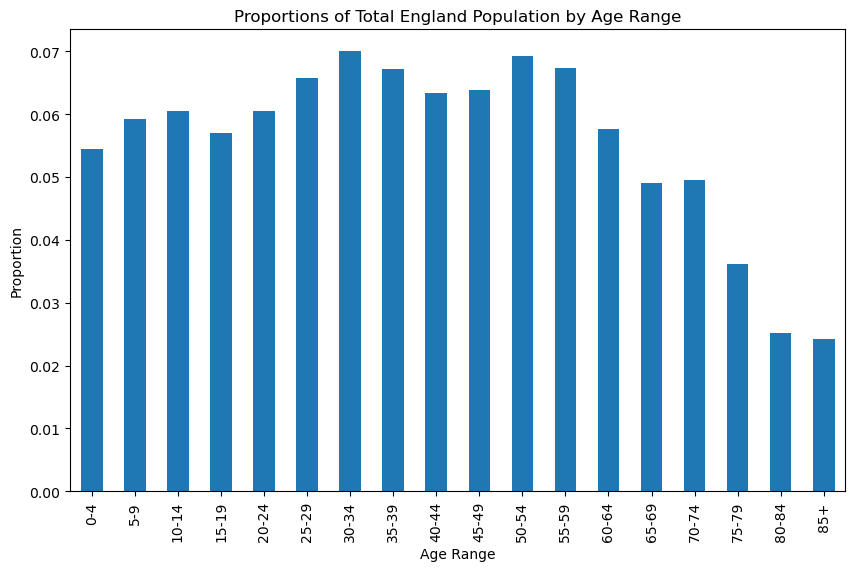

In [8]:
total_population_proportions.plot(kind='bar', figsize=(10,6))
plt.title('Proportions of Total England Population by Age Range')
plt.ylabel('Proportion')
plt.xlabel('Age Range')
plt.show()

See the barchart above for the same information but this time proportion against age range. The data shows that the largest contingent of England's LSOA residents can be considered middle-aged. Likewise, there appear to be more young residents in LSOAs than elderly.

In [10]:
bury_lsoa_code = 'E01005044'

bury_pop_by_age = df.loc[bury_lsoa_code , age_columns]

total_bury_pop = bury_pop_by_age.sum()

bury_population_proportions = bury_pop_by_age / total_bury_pop

bury_population_proportions * 100

0-4      10.963794
5-9      13.921469
10-14    14.941356
15-19     9.841917
20-24     4.232534
25-29     4.895461
30-34     6.221316
35-39      6.73126
40-44     5.966344
45-49     5.201428
50-54     3.926568
55-59     2.753697
60-64     3.059663
65-69      2.90668
70-74     1.835798
75-79     1.325854
80-84     0.866905
85+       0.407955
Name: E01005044, dtype: object

The above percentage against age range data belongs to an LSOA in Bury, Greater Manchester. One sees that the majority of the population is under 25 years old. Less than 7% of the population are of pension-receiving age. See the plot below for a comparison against the age distribution for all of England.

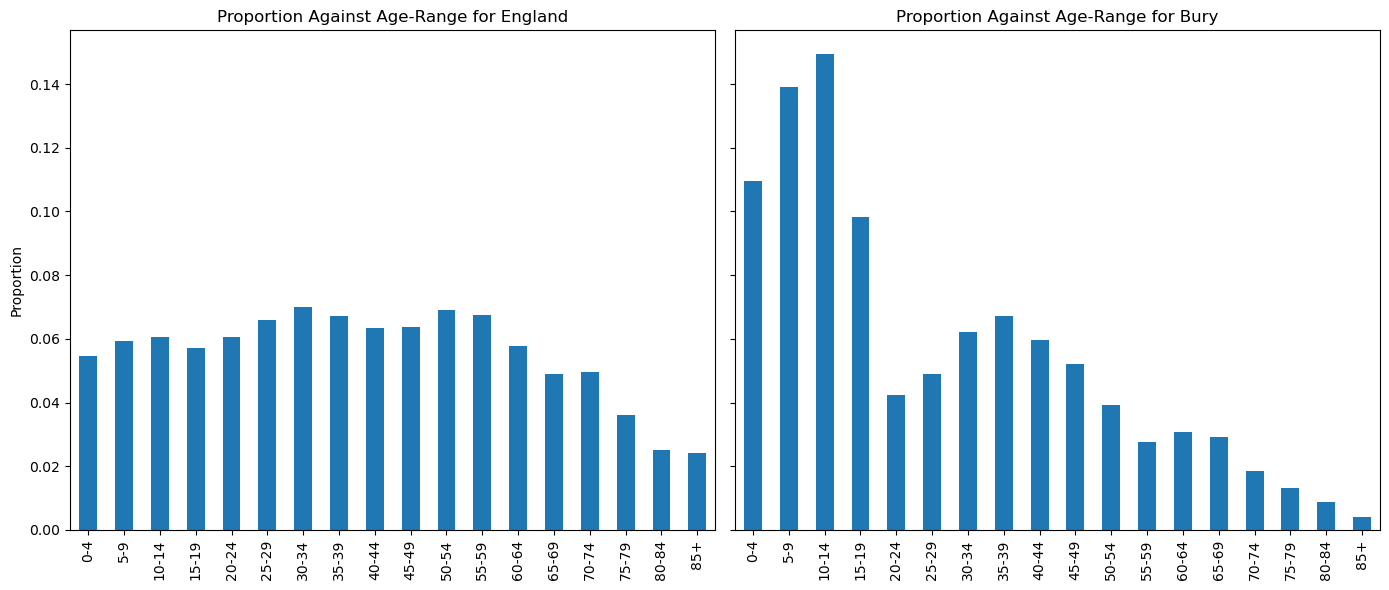

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

total_population_proportions.plot(kind='bar', ax=axes[0])
axes[0].set_title('Proportion Against Age-Range for England')
axes[0].set_ylabel('Proportion')

bury_population_proportions.plot(kind='bar', ax=axes[1])
axes[1].set_title('Proportion Against Age-Range for Bury')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

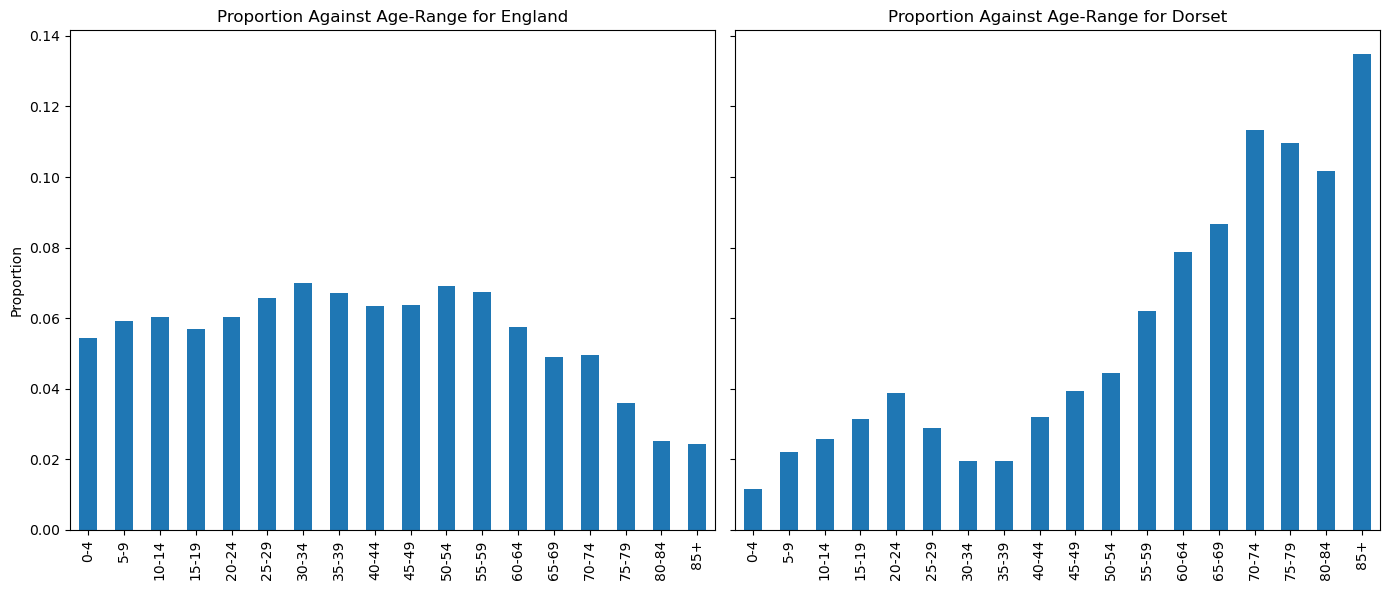

In [13]:
dorset_lsoa_code = 'E01020395'

dorset_population_by_age = df.loc[dorset_lsoa_code, age_columns]

total_dorset_population = dorset_population_by_age.sum()

dorset_population_proportions = dorset_population_by_age / total_dorset_population

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

total_population_proportions.plot(kind='bar', ax=axes[0])
axes[0].set_title('Proportion Against Age-Range for England')
axes[0].set_ylabel('Proportion')

dorset_population_proportions.plot(kind='bar', ax=axes[1])
axes[1].set_title('Proportion Against Age-Range for Dorset')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

See the above comparison between the age demographics of England and an LSOA in Dorset.

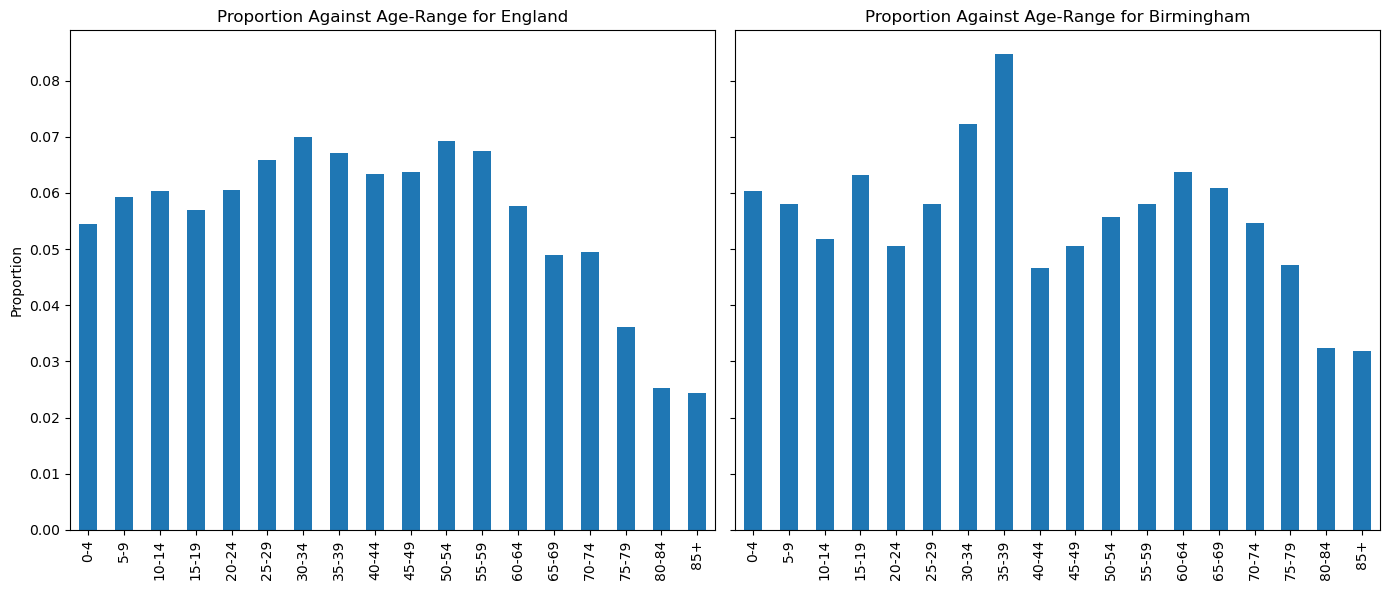

In [15]:
birmingham_lsoa_code = 'E01009136'

birmingham_population_by_age = df.loc[birmingham_lsoa_code, age_columns]

total_birmingham_population = birmingham_population_by_age.sum()

birmingham_population_proportions = birmingham_population_by_age / total_birmingham_population

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

total_population_proportions.plot(kind='bar', ax=axes[0])
axes[0].set_title('Proportion Against Age-Range for England')
axes[0].set_ylabel('Proportion')

birmingham_population_proportions.plot(kind='bar', ax=axes[1])
axes[1].set_title('Proportion Against Age-Range for Birmingham')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

See above for a comparison between England and an LSOA in Birmingham.

The three LSOAs whose age demographics we have seen, the one in Bury, the one in Dorset and the one in Birmingham, appear to be extremes along a continuum. The data for the LSOA in Dorset shows a mostly aging population. So much is to be expected from a rural area - lack of job opportunities cause those of working-age to migrate, coupled with an influx of pensioners eager for the more affordable housing and scenic environment.

The data for the LSOA in Birmingham shows a much larger proportion of people of working-age. So much is to be expected for an LSOA near the centre of Birmingham.

Whilst the data for the LSOA in Bury shows a majority of the population in youth, with moderate numbers of working-age and very few elderly. This could reflect the area's popularity as a residential zone for working professionals starting families.

### 2.2 - Distribution of the Younger, Older and Median Ages in Each LSOA

The aim of this part is to work with histograms.

In [18]:
df = df.assign(Proportion_Younger=lambda x: (x['0-4'] + x['5-9'] + x['10-14'] + x['15-19']) / x['Total'],
               Proportion_Older=lambda x: (x['65-69'] + x['70-74'] + x['75-79'] + x['80-84'] + x['85+']) / x['Total']
              )

In [19]:
cumulative_sum = df[age_columns].cumsum(axis=1)
df_cumulative_fractions = cumulative_sum.div(df['Total'], axis=0)

df_cumulative_fractions.columns = [f'{col}' for col in age_columns]

In [20]:
def calculate_median_interpolated(df):
    medians = []
    
    for index, row in df.iterrows():
        for i in range(len(row)):
            if row.iloc[i] >= 0.5: 
                current_bin = df.columns[i]
                
                lower_bound_current = int(current_bin.split('-')[0]) 
                upper_bound_current = int(current_bin.split('-')[1]) + 1
                
                cumulative_current = row.iloc[i]
                cumulative_previous = row.iloc[i - 1] if i > 0 else 0
                
                interpolation_distance = (0.5 - cumulative_previous) / (cumulative_current - cumulative_previous)
                
                median = lower_bound_current + interpolation_distance * (upper_bound_current - lower_bound_current)
                medians.append(median)
                break
        else:
            medians.append(None)
    
    return medians

df_cumulative_fractions['Median'] = calculate_median_interpolated(df_cumulative_fractions)
df['Median'] = calculate_median_interpolated(df_cumulative_fractions)

df.head()

,LSOAName,PartOfCode,PartOfName,Total,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+,Proportion_Younger,Proportion_Older,Median
LSOACode,,,,,,,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,E09000001,City of London,1473,52,34,32,23,90,159,132,117,114,105,89,73,83,119,102,57,57,35,0.095723,0.251188,44.276316
E01000002,City of London 001B,E09000001,City of London,1384,33,24,22,31,100,166,134,110,92,98,122,88,87,76,69,59,43,30,0.079480,0.200145,43.913043
E01000003,City of London 001C,E09000001,City of London,1613,39,32,33,23,96,187,166,144,111,113,155,118,111,86,85,50,31,33,0.078735,0.176689,43.896396
E01000005,City of London 001E,E09000001,City of London,1101,52,45,35,89,118,97,118,88,61,58,87,82,67,35,26,17,14,12,0.200727,0.094460,34.851695
E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,1842,153,127,110,122,124,130,174,151,164,153,121,85,70,66,41,18,17,16,0.277959,0.085776,34.454023


See the first five rows of our data again, this time with three new columns. The 'Proportion_Younger' gives the proportion of the population in the first four columns (between the ages of 0 and 20). Likewise 'Proportion_Older' gives the proportion of the population in the last five columns (65+). The 'Median' column gives an approximate median age for the LSOA.

In [22]:
df_proportions = df.iloc[:, 3:-3]

df_proportions = df_proportions.div(df_proportions['Total'], axis=0)

df_updated = df.copy()

df_updated[age_columns] = df_proportions[age_columns]

In [23]:
df_updated.describe()

,Total,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+,Proportion_Younger,Proportion_Older,Median
count,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000
mean,1673.532543,0.053741,0.058757,0.060039,0.055296,0.058653,0.064944,0.069142,0.066503,0.062963,0.063808,0.069768,0.068426,0.058795,0.050182,0.050944,0.037162,0.025971,0.024909,0.227832,0.189168,42.032147
std,353.289631,0.017872,0.017201,0.017303,0.026911,0.044940,0.031304,0.026876,0.019040,0.014261,0.011961,0.013772,0.016922,0.017778,0.018997,0.024074,0.019743,0.014380,0.016485,0.055301,0.085520,7.782742
min,999.000000,0.000574,0.000736,0.000000,0.001681,0.010303,0.009922,0.009124,0.007560,0.004469,0.004621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018081,0.000736,14.530516
25%,1443.000000,0.041463,0.047669,0.049470,0.043961,0.040951,0.045652,0.051040,0.053405,0.053361,0.056568,0.061960,0.058373,0.046933,0.036552,0.032558,0.021914,0.015125,0.012882,0.192297,0.123995,36.128752
50%,1608.000000,0.051957,0.057692,0.059172,0.051787,0.049669,0.059570,0.066259,0.065154,0.062051,0.063636,0.070346,0.069214,0.058868,0.049180,0.048893,0.034722,0.023928,0.021834,0.223183,0.182751,41.460674
75%,1835.000000,0.064119,0.069127,0.069884,0.060944,0.060845,0.075023,0.081604,0.077481,0.071722,0.070831,0.078469,0.079476,0.070529,0.062857,0.067095,0.049902,0.034521,0.033139,0.258689,0.246851,47.821934
max,9900.000000,0.187974,0.198515,0.204102,0.604920,0.761453,0.418487,0.306422,0.199497,0.151205,0.156608,0.148551,0.159059,0.146475,0.132827,0.175394,0.149261,0.146492,0.191185,0.628793,0.655409,71.875000


See the above summary statistics for the data. Note that the values in the age columns (betwwen and including '0-4' and '85+') are proportions of the total population. The 'Median' column displays very useful information. The mean-median age in an LSOA in England is 42.03, whilst the median-median age is 41.46. Note the sources of error in these values. First, due to the nature of the data, an approximation was needed to calculate the median age per LSOA. These approximatations were then used to compute their mean and median respectively. A different method is used to arrive at a median age for England's LSOA residents below.

In [25]:
cum_sum_total_population = total_population_proportions.cumsum()

median_bin = None
previous_bin = None

for index, value in cum_sum_total_population.items():
    if value > 0.5:
        median_bin = index
        break
    previous_bin = index

lower_bound = int(median_bin.split('-')[0])
upper_bound = int(median_bin.split('-')[1]) + 1

cum_current = cum_sum_total_population.loc[median_bin]
cum_previous = cum_sum_total_population.loc[previous_bin]

interpolation_distance = (0.5 - cum_previous) / (cum_current - cum_previous)
                
median = lower_bound + interpolation_distance * (upper_bound - lower_bound)

print(f"The median age for England is {median:.4} years old")

The median age for England is 40.43 years old


The median age for England's LSOA residents, as per a 'better' calculation, is 40.43 years old. To arrive at this result all LSOA data was first summed, thereby giving total numbers of people per age group in England, and then a median calculated. One would expect variation between the median-median value above and this newly-calculated median. In the first case, a median age was calculated for every LSOA, after which a median of these medians was calculated. This approach does not consider the size of the population in each LSOA - smaller areas with fewer people have the same influence on the final median-median result as larger ones, thereby possibly skewing the final result.

In [27]:
bin_mapping = {col: f"{int(col.split('-')[0])}-{int(col.split('-')[1]) + 1}" for col in age_columns[:-1]}
bin_mapping['85+'] = '85-90'
df_updated.rename(columns=bin_mapping, inplace=True)

df_updated.head()

,LSOAName,PartOfCode,PartOfName,Total,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-55,55-60,60-65,65-70,70-75,75-80,80-85,85-90,Proportion_Younger,Proportion_Older,Median
LSOACode,,,,,,,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,E09000001,City of London,1473,0.035302,0.023082,0.021724,0.015614,0.061100,0.107943,0.089613,0.079430,0.077393,0.071283,0.060421,0.049559,0.056348,0.080788,0.069246,0.038697,0.038697,0.023761,0.095723,0.251188,44.276316
E01000002,City of London 001B,E09000001,City of London,1384,0.023844,0.017341,0.015896,0.022399,0.072254,0.119942,0.096821,0.079480,0.066474,0.070809,0.088150,0.063584,0.062861,0.054913,0.049855,0.042630,0.031069,0.021676,0.079480,0.200145,43.913043
E01000003,City of London 001C,E09000001,City of London,1613,0.024179,0.019839,0.020459,0.014259,0.059516,0.115933,0.102914,0.089275,0.068816,0.070056,0.096094,0.073156,0.068816,0.053317,0.052697,0.030998,0.019219,0.020459,0.078735,0.176689,43.896396
E01000005,City of London 001E,E09000001,City of London,1101,0.047230,0.040872,0.031789,0.080836,0.107175,0.088102,0.107175,0.079927,0.055404,0.052679,0.079019,0.074478,0.060854,0.031789,0.023615,0.015441,0.012716,0.010899,0.200727,0.094460,34.851695
E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,1842,0.083062,0.068947,0.059718,0.066232,0.067318,0.070575,0.094463,0.081976,0.089034,0.083062,0.065689,0.046145,0.038002,0.035831,0.022258,0.009772,0.009229,0.008686,0.277959,0.085776,34.454023


See above for a slight modification to the labels of the age columns. Every upper-bound has been incremented by one year, e.g., '0-5' in place of '0-4'. This is for the reason previously discussed. '0-5' really represents: 0 ≤ x < 5, with x being someone's age. And for consistency whilst plotting, the final column, '85+' has been replaced by '85-90', thereby giving each age range a width of 5 years.

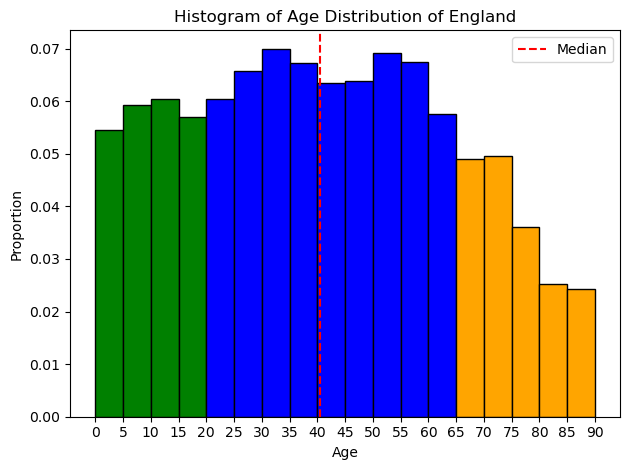

In [29]:
total_pop_series = total_population_proportions.rename(index=bin_mapping)

bin_centers = [int(bin.split('-')[0]) for bin in total_pop_series.index]

colors = []
for age_range in total_pop_series.index:
    if age_range == '85-90':
        colors.append('orange') 
    else:
        lower_bound = int(age_range.split('-')[0])
        if lower_bound <= 15:  # Younger residents
            colors.append('green')
        elif lower_bound >= 65: 
            colors.append('orange')
        else:
            colors.append('blue')


plt.bar(bin_centers, total_pop_series.values, width=5, color=colors, align='edge', edgecolor='black')
plt.axvline(x=median, color='r', linestyle='--', label='Median')
plt.xticks(range(0, 91, 5)) 
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Histogram of Age Distribution of England')
plt.legend()
plt.tight_layout() 
plt.show()


See the above histogram of proportion against age for England's LSOA residents. The green bars correspond to those termed 'younger' before, those whose ages satisfy: 0 ≤ x < 20. The orange bars indicate those termed 'older', those whose ages satisfy: 65 ≤ x.

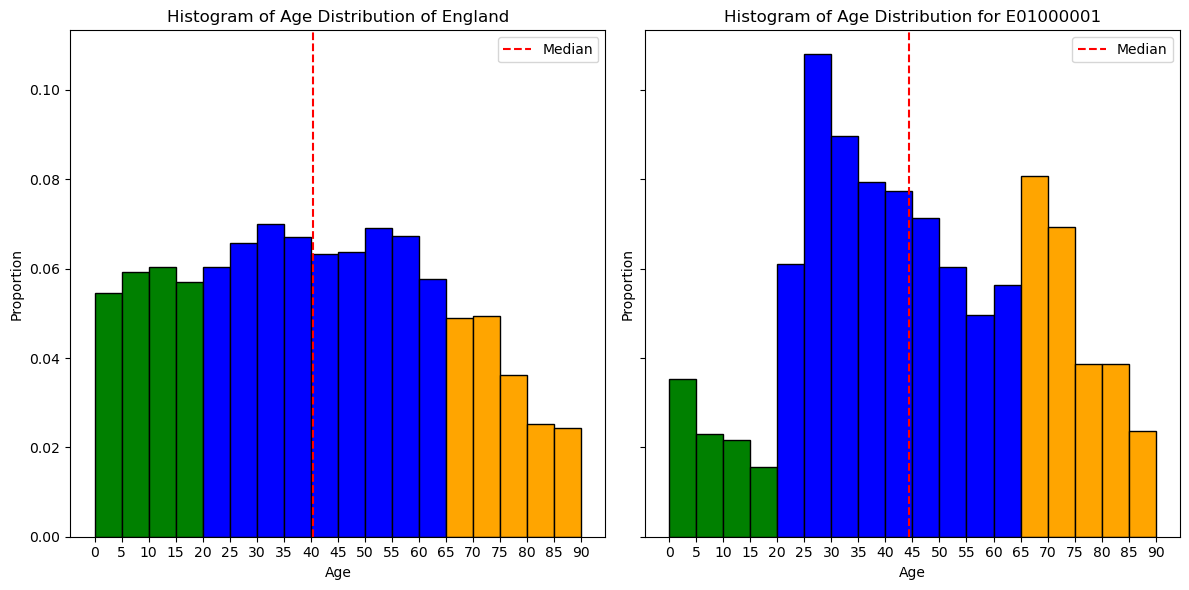

In [31]:
def lsoa_vs_england(lsoa_code):
    lsoa_data = df_updated.loc[lsoa_code, '0-5':'85-90']

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    axs[0].bar(bin_centers, total_population_proportions.values, width=5, color=colors, align='edge', edgecolor='black')
    axs[0].axvline(x=median, color='r', linestyle='--', label='Median')
    axs[0].set_xticks(range(0, 91, 5))  # Display age increments of 5
    axs[0].set_xlabel('Age')
    axs[0].set_ylabel('Proportion')
    axs[0].set_title('Histogram of Age Distribution of England')
    axs[0].legend()

    axs[1].bar(bin_centers, lsoa_data.values, width=5, color=colors, align='edge', edgecolor='black')
    axs[1].axvline(x=df_updated.loc[lsoa_code, 'Median'], color='r', linestyle='--', label='Median')
    axs[1].set_xticks(range(0, 91, 5)) 
    axs[1].set_xlabel('Age')
    axs[1].set_ylabel('Proportion')
    axs[1].set_title(f'Histogram of Age Distribution for {lsoa_code}')
    axs[1].legend()

    plt.tight_layout() 
    plt.show()

lsoa_vs_england('E01000001')

The above plot is a comparison between England and the very first LSOA in our data. Being in the City of London, we rightfully observe a larger contingent of working-age people than in England as a whole.

The code in the cell above is modifiable to allow for comparisons between England and other LSOAs. Simply change the LSOA within the brackets.

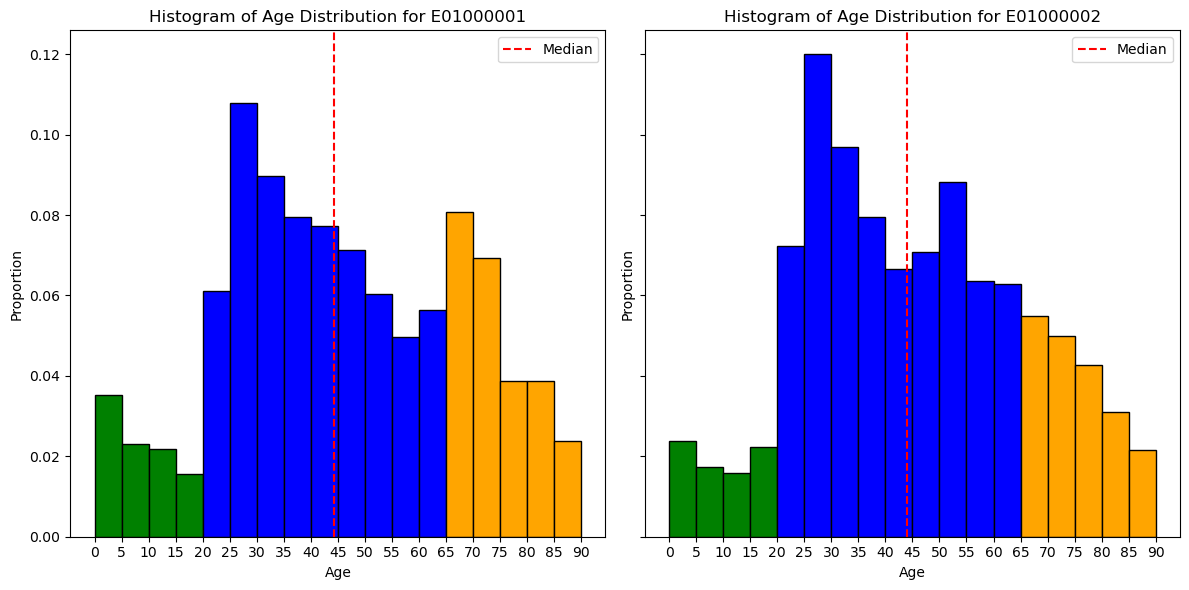

In [33]:
def lsoa_vs_lsoa(lsoa_code_1, lsoa_code_2):
    lsoa_1_data = df_updated.loc[lsoa_code_1, '0-5':'85-90']
    lsoa_2_data = df_updated.loc[lsoa_code_2, '0-5':'85-90']

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    
    axs[0].bar(bin_centers, lsoa_1_data.values, width=5, color=colors, align='edge', edgecolor='black')
    axs[0].axvline(x=df_updated.loc[lsoa_code_1, 'Median'], color='r', linestyle='--', label='Median')
    axs[0].set_xticks(range(0, 91, 5))  # Display age increments of 5
    axs[0].set_xlabel('Age')
    axs[0].set_ylabel('Proportion')
    axs[0].set_title(f'Histogram of Age Distribution for {lsoa_code_1}')
    axs[0].legend()

    axs[1].bar(bin_centers, lsoa_2_data.values, width=5, color=colors, align='edge', edgecolor='black')
    axs[1].axvline(x=df_updated.loc[lsoa_code_2, 'Median'], color='r', linestyle='--', label='Median')
    axs[1].set_xticks(range(0, 91, 5))  # Display age increments of 5
    axs[1].set_xlabel('Age')
    axs[1].set_ylabel('Proportion')
    axs[1].set_title(f'Histogram of Age Distribution for {lsoa_code_2}')
    axs[1].legend()

    plt.tight_layout() 
    plt.show()

lsoa_vs_lsoa('E01000001','E01000002')

Now see a comparison between the first two LSOAs in our data. Despite having differences in their population distribution, the two LSOAs have a similar median age.

Change the LSOA codes in the final line to compare different LSOAs.

In [35]:
highest_proportion_younger_index = df_updated['Proportion_Younger'].idxmax()

highest_proportion_younger_lsoa_name = df_updated.loc[highest_proportion_younger_index, 'LSOAName']

print(f"LSOA Code: {highest_proportion_younger_index}, LSOA Name: {highest_proportion_younger_lsoa_name}")

LSOA Code: E01034936, LSOA Name: Birmingham 079G


In [36]:
highest_proportion_older_index = df_updated['Proportion_Older'].idxmax()

highest_proportion_older_lsoa_name = df_updated.loc[highest_proportion_older_index, 'LSOAName']

print(f"LSOA Code: {highest_proportion_older_index}, LSOA Name: {highest_proportion_older_lsoa_name}")

LSOA Code: E01019957, LSOA Name: East Devon 012B


The above two cells return information relating to the LSOAs with highest proportion of 'younger' and 'older' people. Birmingham 079G has largest proportion of younger people, whilst East Devon 012B has the largest proportion of older people.

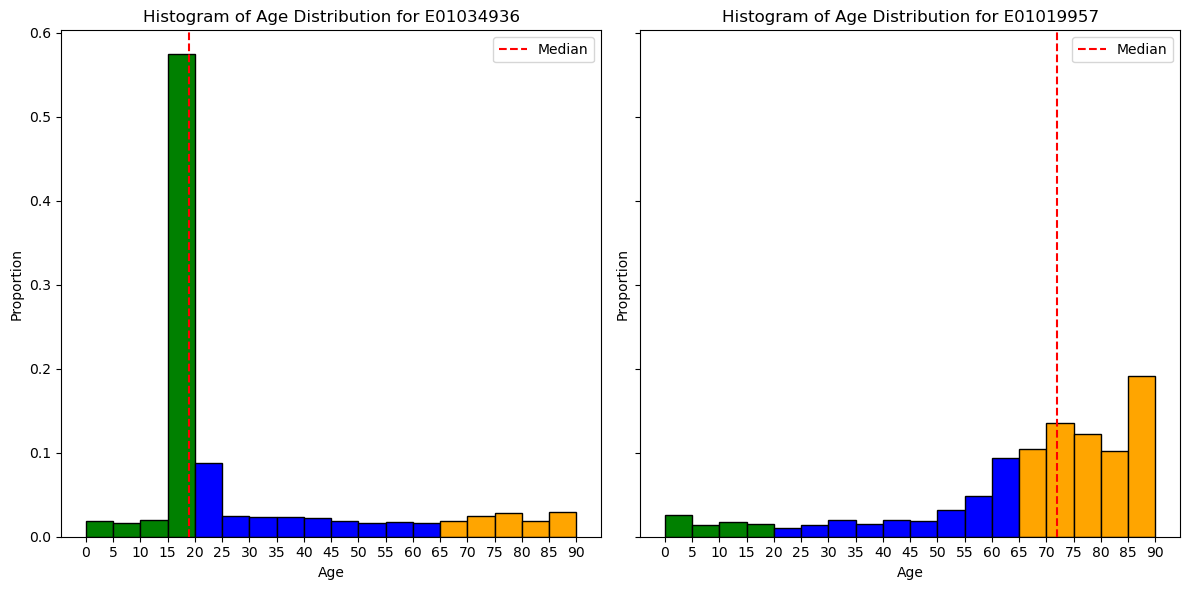

In [38]:
lsoa_vs_lsoa(highest_proportion_younger_index, highest_proportion_older_index)

The above plots compare the age demographics of Birmingham 079G (left) with East Devon 012B (right). Note the marked differences in their median ages and overall distribution profile. Over 50% of those residing in Birmingham 079G are between the ages of 15 and 20. The difference in the median age of 079G and 012B is over 50 years. 

The two appear to be more extreme cases than those previously observed. Birmingham 079G as a more extreme version of the LSOA in Bury, and East Devon 012B as a more extreme version of the LSOA in Dorset.

### 2.3 - Comparing the Median Age Distributions by Area Type

The aim of this section is to compare distributions, grouping the LSO areas by type.

LSOAs can be categorised based off of their locale. The first three characters contained in the 'PartOfCode' column dicate how an LSOA be categorised. If the first three initials are 'E06', the LSOA is categorised as a Unitary Autority, if 'E07' a Non-metropolitan District, 'E08', a Metropolitan District, 'E09', a London Borough.

In [41]:
df.rename(columns=bin_mapping, inplace=True)

def area_type(part_of_code):
    prefix = part_of_code[:3]
    if prefix == 'E06':
        return 'Unitary Authorities'
    elif prefix == 'E07':
        return 'Non-metropolitan Districts'
    elif prefix == 'E08':
        return 'Metropolitan Districts'
    elif prefix == 'E09':
        return 'London Borough'

df['AreaType'] = df['PartOfCode'].apply(area_type)

total_plus_age_cols = df.iloc[:, 3:-4]

grouped = df.groupby('AreaType')[total_plus_age_cols.columns].sum()
grouped

,Total,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-55,55-60,60-65,65-70,70-75,75-80,80-85,85-90
AreaType,,,,,,,,,,,,,,,,,,,
London Borough,8799631,528970,531462,535452,489470,589134,786543,808275,735679,667235,594021,573817,511597,404549,306304,269131,189677,140684,137631
Metropolitan Districts,12064295,704023,760732,766648,745884,820895,817629,856415,814466,743095,738140,805910,776529,669978,561299,547320,392164,282522,260646
Non-metropolitan Districts,20947819,1064032,1186223,1223090,1133080,1097645,1196309,1303304,1282413,1257743,1339586,1511257,1513524,1314813,1153666,1225039,911234,624568,610293
Unitary Authorities,14678346,779826,870259,888175,850414,906673,914906,984670,962808,912419,930933,1016858,1004624,866717,746125,755179,545633,378408,363719


The above table contains all of the information from our dataset, condensed into just four rows. Data pertaining to particular LSOAs has been collected to form data relating to the four area types discussed above. The table above shows total number of people in England that belong to particular age ranges, per area type.

In [43]:
df_grouped_proportions = grouped.copy()

df_grouped_proportions = df_grouped_proportions.div(df_grouped_proportions['Total'], axis=0)

df_grouped_proportions = df_grouped_proportions.drop(columns=['Total'])

grouped_cumsum = df_grouped_proportions.cumsum(axis=1)

df_grouped_proportions['Median'] = calculate_median_interpolated(grouped_cumsum)

df_grouped_proportions = df_grouped_proportions.assign(Proportion_Younger=lambda x: x['0-5'] + x['5-10'] + x['10-15'] + x['15-20'],
                                                       Proportion_Older=lambda x: x['65-70'] + x['70-75'] + x['75-80'] + x['80-85'] + x['85-90'])
df_grouped_proportions

,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-55,55-60,60-65,65-70,70-75,75-80,80-85,85-90,Median,Proportion_Younger,Proportion_Older
AreaType,,,,,,,,,,,,,,,,,,,,,
London Borough,0.060113,0.060396,0.060849,0.055624,0.066950,0.089384,0.091853,0.083603,0.075825,0.067505,0.065209,0.058138,0.045973,0.034809,0.030584,0.021555,0.015987,0.015641,36.064400,0.236982,0.118576
Metropolitan Districts,0.058356,0.063056,0.063547,0.061826,0.068043,0.067773,0.070988,0.067510,0.061595,0.061184,0.066801,0.064366,0.055534,0.046526,0.045367,0.032506,0.023418,0.021605,39.124824,0.246785,0.169422
Non-metropolitan Districts,0.050794,0.056628,0.058387,0.054091,0.052399,0.057109,0.062217,0.061219,0.060042,0.063949,0.072144,0.072252,0.062766,0.055073,0.058481,0.043500,0.029815,0.029134,44.712315,0.219900,0.216003
Unitary Authorities,0.053128,0.059289,0.060509,0.057937,0.061769,0.062330,0.067083,0.065594,0.062161,0.063422,0.069276,0.068443,0.059047,0.050832,0.051449,0.037173,0.025780,0.024779,41.193149,0.230862,0.190012


The table above contains the three additional columns from before: 'Median', 'Proportion_Younger' and 'Proportion_Older'.

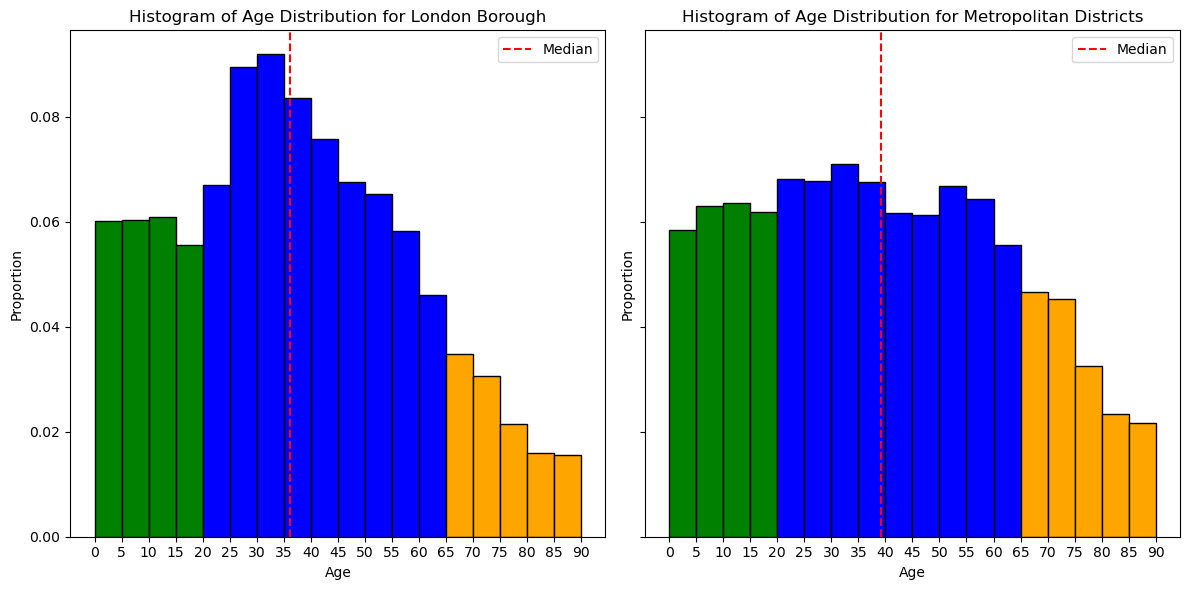

In [45]:
def area_vs_area(area_name_1, area_name_2):
    area_1_data = df_grouped_proportions.loc[area_name_1].iloc[:-3]
    area_2_data = df_grouped_proportions.loc[area_name_2].iloc[:-3]

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    
    axs[0].bar(bin_centers, area_1_data.values, width=5, color=colors, align='edge', edgecolor='black')
    axs[0].axvline(x=df_grouped_proportions.loc[area_name_1, 'Median'], color='r', linestyle='--', label='Median')
    axs[0].set_xticks(range(0, 91, 5))
    axs[0].set_xlabel('Age')
    axs[0].set_ylabel('Proportion')
    axs[0].set_title(f'Histogram of Age Distribution for {area_name_1}')
    axs[0].legend()

    axs[1].bar(bin_centers, area_2_data.values, width=5, color=colors, align='edge', edgecolor='black')
    axs[1].axvline(x=df_grouped_proportions.loc[area_name_2, 'Median'], color='r', linestyle='--', label='Median')
    axs[1].set_xticks(range(0, 91, 5))
    axs[1].set_xlabel('Age')
    axs[1].set_ylabel('Proportion')
    axs[1].set_title(f'Histogram of Age Distribution for {area_name_2}')
    axs[1].legend()

    plt.tight_layout() 
    plt.show()

area_vs_area('London Borough', 'Metropolitan Districts')


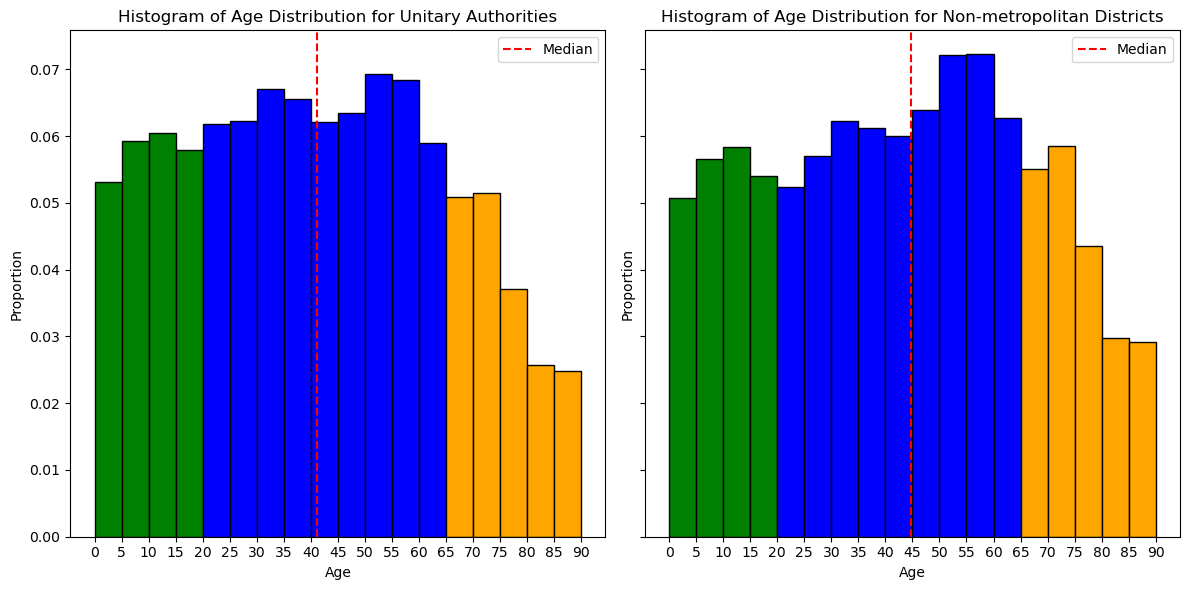

In [46]:
area_vs_area('Unitary Authorities','Non-metropolitan Districts')

See the above, four historgrams of proportion against age for the four LSOA area types.

London boroughs have the lowerst median age, as well as the lowest proportion of older people. In place, London boroughs have the largest contingent of working-age people, as expected.

Non-metropolitan districts have the highest median age and largest share of elderly. This is also as expected as non-metropolitan districts tend to be more rural.

### 2.4 - Classification of Unusual Areas by Proportions

The aim of this section is to look at the relationship between the younger and older proportions across the LSO areas.

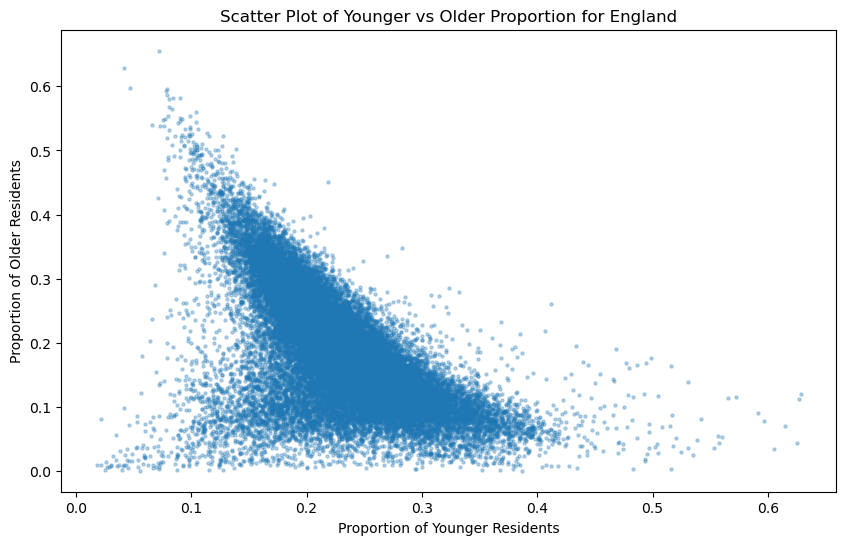

In [49]:
df_updated.plot.scatter(x='Proportion_Younger', y='Proportion_Older', 
                        s=5, alpha=0.3, figsize=(10, 6),
                        title='Scatter Plot of Younger vs Older Proportion for England')

plt.xlabel('Proportion of Younger Residents')
plt.ylabel('Proportion of Older Residents')
plt.show()

The above graph is a scatter plot of the proportion of younger residents vs the proportion older, with a data point for every LSOA in England. 

The data points in the middle, dark blue, triangular region of the plot are somewhat difficult to differentiate from each other due to the vast number of data points. Data points within this large, triangular region do show some significant variation from one another. Despite this, we observe that data points within the triangular region belong to LSOAs with a moderate share of both elderly and youth.

Not all data points are found within the dense, triangular region, however. Around the three corners of the triangle exist data points which can be discerned from one another. These data points represent LSOAs whose age demographics do not align with the general trend observed by those LSOAs in the triangular region, viz. LSOAs which do not have a moderate share of both youth and elderly.

One can discern many data points in the bottom left of the plot. These belong to LSOAs which have a low proportion of both youth and elderly. We can infer that these LSOAs must have a larger share of people of working-age. We term these LSOAs as 'Working'. LSOAs termed as 'Working' have less than 10% of their population under the age of 20, as well as having less than 10% of their population over the age of 65 (have both a proportion older and proportion younger less than 0.1).

Likewise, we can discern many data points in the bottom right of the scatter plot. These belong to LSOAs with a very high proportion of youth, but with a very low proportion of elderly. We term these LSOAs as 'Young'. These LSOAs have over 40% of their population below the age of 20, and no more than 15% of their population above the age of 65.

Lastly, we find a discernable corner at the top left of the plot. These data points belong to LSOAs with a high proportion of elderly and low proportion of youth. We term thse these LSOAs as 'Aging'. These LSOAs have less than 15% of their population under the age of 20, as well as having over 40% of their population over the age of 40.

If a LSOA does not meet any of these conditions, we term it as 'Normal'. Most of these 'Normal' LSOAs will be found within the triangular region.

In [51]:
def classify_area(row):
    if row['Proportion_Younger'] > 0.4 and row['Proportion_Older'] < 0.15:
        return 'Young'
    elif row['Proportion_Younger'] < 0.15 and row['Proportion_Older'] > 0.40:
        return 'Aging'
    elif row['Proportion_Younger'] < 0.1 and row['Proportion_Older'] < 0.1:
        return 'Working'
    else:
        return 'Normal'

df_updated['Area_Class'] = df_updated.apply(classify_area, axis=1)
df_updated.head()

,LSOAName,PartOfCode,PartOfName,Total,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-55,55-60,60-65,65-70,70-75,75-80,80-85,85-90,Proportion_Younger,Proportion_Older,Median,Area_Class
LSOACode,,,,,,,,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,E09000001,City of London,1473,0.035302,0.023082,0.021724,0.015614,0.061100,0.107943,0.089613,0.079430,0.077393,0.071283,0.060421,0.049559,0.056348,0.080788,0.069246,0.038697,0.038697,0.023761,0.095723,0.251188,44.276316,Normal
E01000002,City of London 001B,E09000001,City of London,1384,0.023844,0.017341,0.015896,0.022399,0.072254,0.119942,0.096821,0.079480,0.066474,0.070809,0.088150,0.063584,0.062861,0.054913,0.049855,0.042630,0.031069,0.021676,0.079480,0.200145,43.913043,Normal
E01000003,City of London 001C,E09000001,City of London,1613,0.024179,0.019839,0.020459,0.014259,0.059516,0.115933,0.102914,0.089275,0.068816,0.070056,0.096094,0.073156,0.068816,0.053317,0.052697,0.030998,0.019219,0.020459,0.078735,0.176689,43.896396,Normal
E01000005,City of London 001E,E09000001,City of London,1101,0.047230,0.040872,0.031789,0.080836,0.107175,0.088102,0.107175,0.079927,0.055404,0.052679,0.079019,0.074478,0.060854,0.031789,0.023615,0.015441,0.012716,0.010899,0.200727,0.094460,34.851695,Normal
E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,1842,0.083062,0.068947,0.059718,0.066232,0.067318,0.070575,0.094463,0.081976,0.089034,0.083062,0.065689,0.046145,0.038002,0.035831,0.022258,0.009772,0.009229,0.008686,0.277959,0.085776,34.454023,Normal


See the first five rows of our LSOA data again, this time with an additional column, 'Area_Class' whose value is dependent on which of the four condiitons (mentioned above) the LSOA satisfies.

            LSOAName
Area_Class          
Aging            380
Normal         33091
Working          119
Young            165


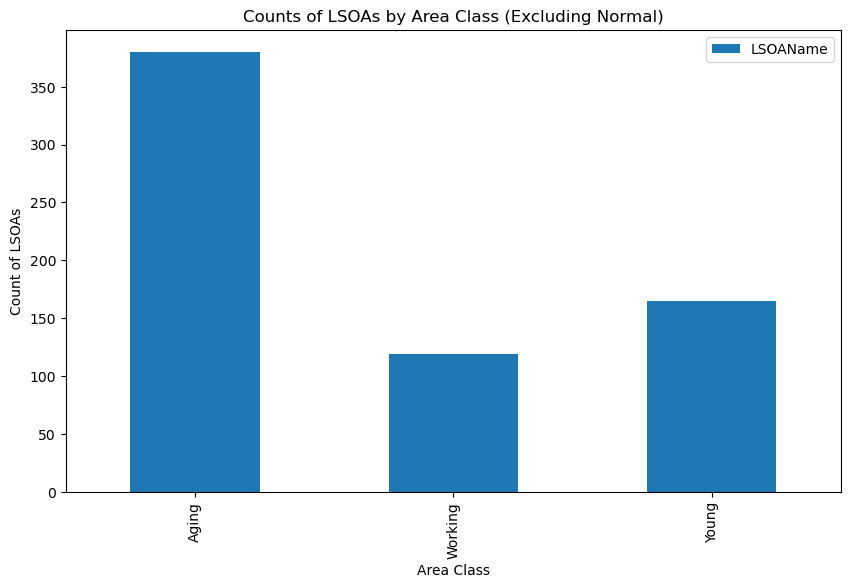

In [53]:
pivot_table = df_updated.pivot_table(index='Area_Class', values='LSOAName', aggfunc='count')

print(pivot_table)

pivot_table_excluding_normal = pivot_table[pivot_table.index != 'Normal']
pivot_table_excluding_normal.plot(kind='bar', title='Counts of LSOAs by Area Class (Excluding Normal)', figsize=(10, 6))

plt.xlabel('Area Class')
plt.ylabel('Count of LSOAs')
plt.show()

An overwhelming majority of LSOAs in England belong to the 'Normal' class. The barchart above ignores these 'Normal' LSOAs and shows bars for the other three LSOA types. There are over twice as many 'Aging' LSOAs as there are 'Young' ones, and over three times as many 'Aging' ones as there are 'Working' ones. This reflects the idea that Britain has an aging population